In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
1 Seasonal Price Fluctuations:

Rental prices in Barcelona exhibit seasonal fluctuations, with prices varying throughout the year.
Analysis: Examine the average rental prices for each trimester across multiple years to identify seasonal trends.
Are prices higher in certain seasons? Is there a consistent pattern?

2. Yearly Rental Price Trends:

Rental prices in Barcelona have shown a consistent trend of increase, decrease, or stability over the years.
Calculate the year-over-year percentage change in rental prices.
Identify if prices have generally increased, decreased, or remained relatively stable.

3. Effect of Economic Factors:

Economic factors, such as inflation or unemployment rates, have influenced rental prices in Barcelona.
Correlate rental price data with economic indicators for the same time frame.
Determine if there is a relationship between economic conditions and rental prices.

4. Location-Based Price Variations:

Different neighborhoods or districts in Barcelona have distinct rental price patterns.
Segment the dataset by neighborhoods or districts and analyze rental price trends for each area.
Are there areas where rental prices have increased more rapidly than others?

5. Impact of External Events:

Significant events like economic crises, government policies, or the COVID-19 pandemic have had an impact on rental prices.
Identify key events and periods of interest in the dataset and examine how rental prices were affected during these times.
Explore whether there were temporary or long-lasting effects.
"""

In [2]:
rent = pd.read_csv('/Users/juniorlinhares/Documents/projects/Project-Data-Pipeline/data/Barcelona_rent_price.csv')

In [3]:
df = pd.read_csv('/Users/juniorlinhares/Documents/projects/Project-Data-Pipeline/data/average_wage_spain.csv')

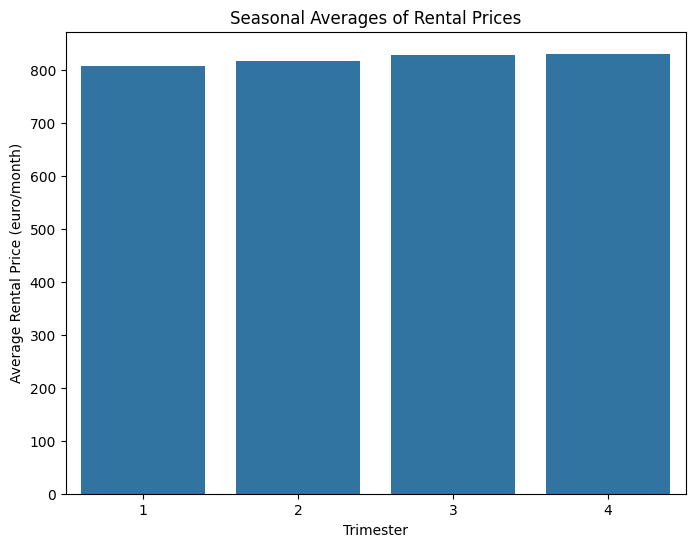

In [4]:
# Bar Chart for Seasonal Averages
seasonal_averages = rent.groupby('Trimester')['Average _rent (euro/month)'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Trimester', y='Average _rent (euro/month)', data=seasonal_averages)
plt.title('Seasonal Averages of Rental Prices')
plt.xlabel('Trimester')
plt.ylabel('Average Rental Price (euro/month)')
plt.show()

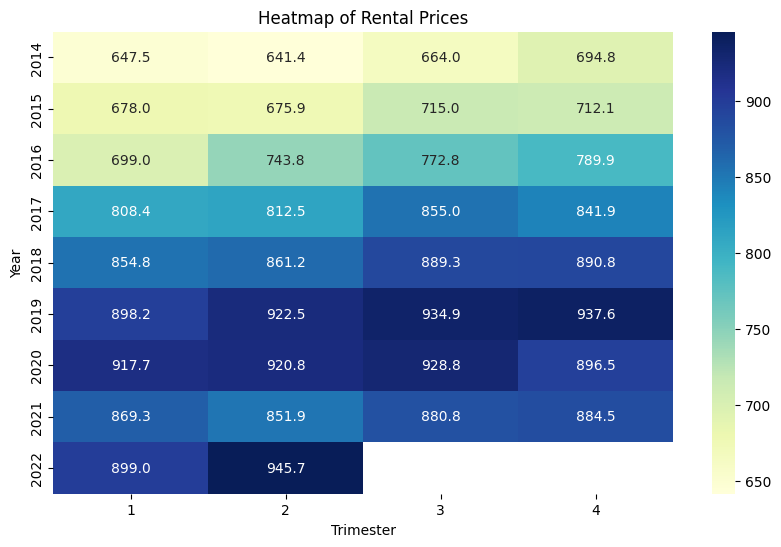

In [5]:
# Heatmap
pivot_table = rent.pivot_table(index='Year', columns='Trimester', values='Average _rent (euro/month)')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Rental Prices')
plt.xlabel('Trimester')
plt.ylabel('Year')
plt.show()

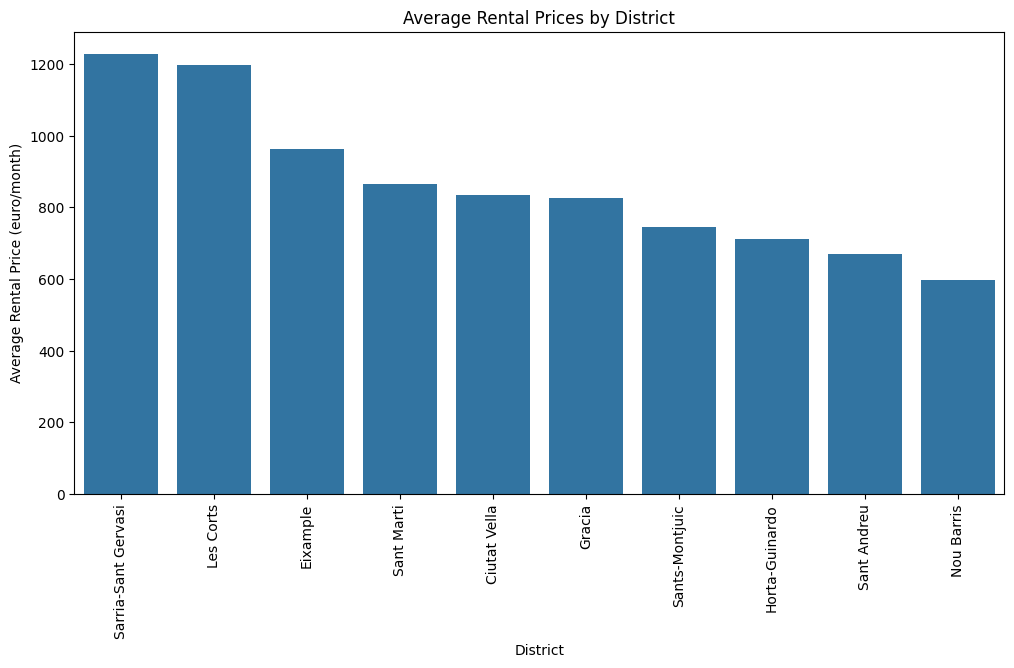

In [6]:
rent['Year'] = rent['Year'].astype(int)
segmented_data = rent.groupby('District')
mean_rental_prices = segmented_data['Average _rent (euro/month)'].mean()
sorted_rental_prices = mean_rental_prices.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_rental_prices.index, y=sorted_rental_prices.values)
plt.xticks(rotation=90)
plt.title('Average Rental Prices by District')
plt.xlabel('District')
plt.ylabel('Average Rental Price (euro/month)')
plt.show()

In [7]:
rent_sorted = rent.sort_values(by='Average _rent (euro/month)', ascending=False)
rent_unique = rent_sorted.drop_duplicates(subset='Neighbourhood', keep='first')
top_3_neighbourhoods = rent_unique.head(3)
top_3_neighbourhoods

,Year,Trimester,District,Neighbourhood,Average _rent (euro/month),Average _rent per surface (euro/m2)
430,2015,3,Les Corts,Pedralbes,2034.00,17.00
2266,2022,2,Sarria-Sant Gervasi,les Tres Torres,1767.00,16.90
226,2014,4,Sarria-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",1754.44,15.88


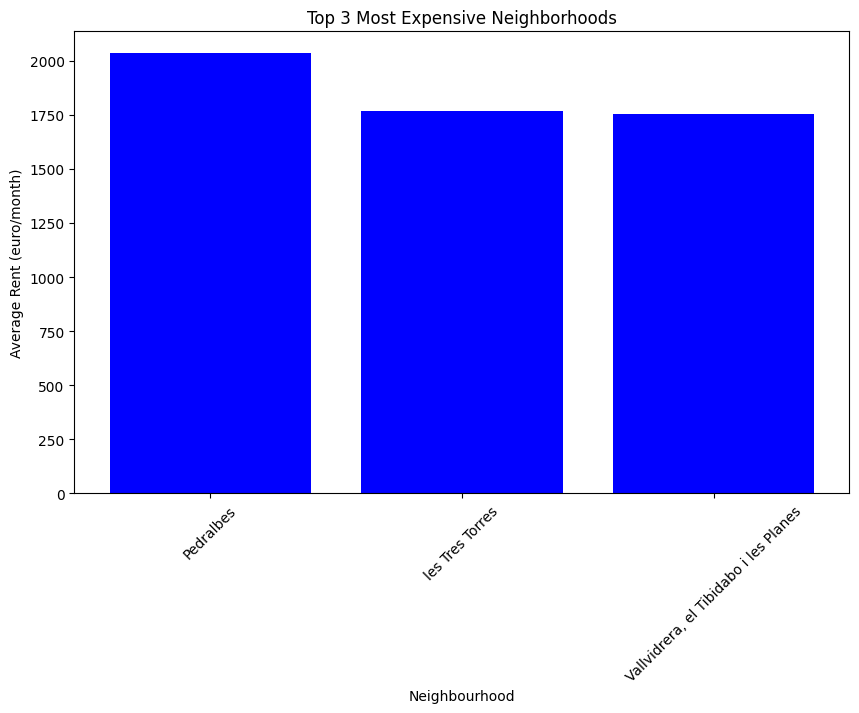

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(top_3_neighbourhoods['Neighbourhood'], top_3_neighbourhoods['Average _rent (euro/month)'], color='b')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Rent (euro/month)')
plt.title('Top 3 Most Expensive Neighborhoods')
plt.xticks(rotation=45)
plt.show()

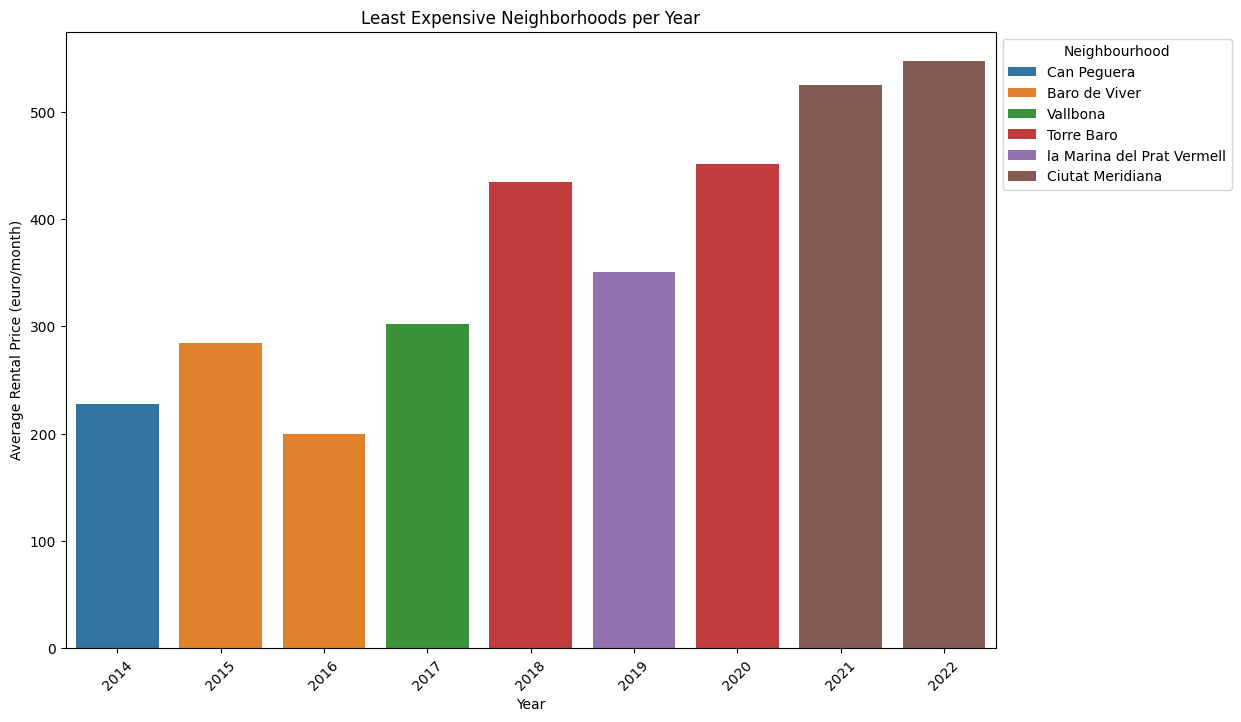

In [9]:
neighborhood_avg_rent = rent.groupby(['Year', 'Neighbourhood'])['Average _rent (euro/month)'].mean().reset_index()
least_expensive_neighborhoods = neighborhood_avg_rent.loc[neighborhood_avg_rent.groupby('Year')['Average _rent (euro/month)'].idxmin()]
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Average _rent (euro/month)', hue='Neighbourhood', data=least_expensive_neighborhoods)
plt.title('Least Expensive Neighborhoods per Year')
plt.xlabel('Year')
plt.ylabel('Average Rental Price (euro/month)')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood', bbox_to_anchor=(1, 1))

plt.show()

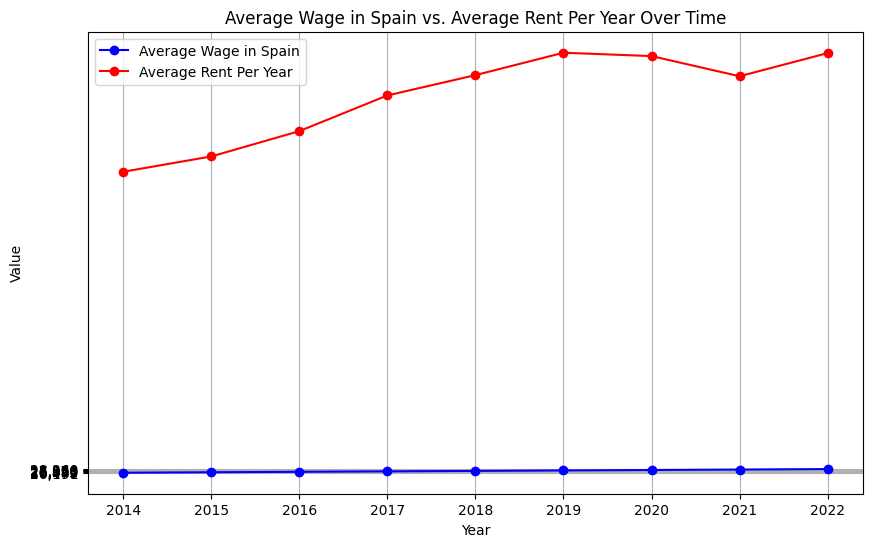

In [10]:
average_rent_per_year = rent.groupby('Year')['Average _rent (euro/month)'].mean().round(2)
average_rent_per_year_list = average_rent_per_year.tolist()
average_rent_per_year_list
df['Average Rent Per Year'] = average_rent_per_year_list

years = df['Year']
wage = df['Average Wage in Spain']
rent = df['Average Rent Per Year']

plt.figure(figsize=(10, 6))
plt.plot(years, wage, marker='o', linestyle='-', color='b', label='Average Wage in Spain')
plt.plot(years, rent, marker='o', linestyle='-', color='r', label='Average Rent Per Year')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Wage in Spain vs. Average Rent Per Year Over Time')
plt.legend()
plt.grid(True)
plt.show()